## YBCO overdoped sample - analysis of 19/06 measurments

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt

import linear_acoustic_fit
import nonlinear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import debye_integration as db

### Non linear fit, Debye model

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 12 K : good agreements with the data, optimizd paramters : Beta, Gamma, n, E =  0.7507, 3.077, 0.0121, 7.9315e-23

Between 0 and 20 K : visually less good agreement with the experimental data : Beta, Gamma, n, E =  0.8488, 0.2344, 0.00128, 7.497e-23
But the gamma become near 0 (less than 1e-2)

Important sensibility to the E parameter -> better to substrcst the Schottky anomaly

Beta, Gamma, n, E :  0.848534757508169 0.2344136468818058 0.0012855140803287948 7.497471094190909e-23


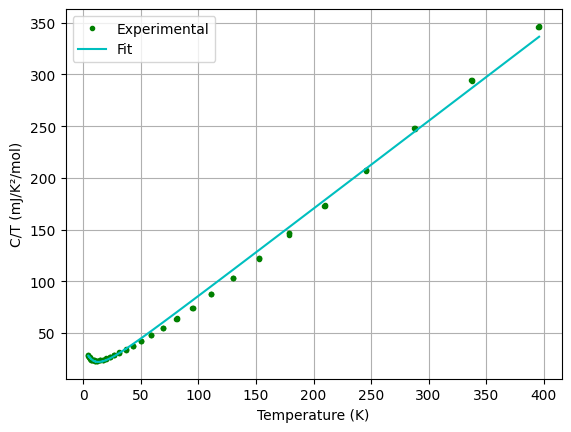

Beta, Gamma, n, E :  0.7507684345634513 3.0778963986697523 0.0012159286233213206 7.931574204614548e-23


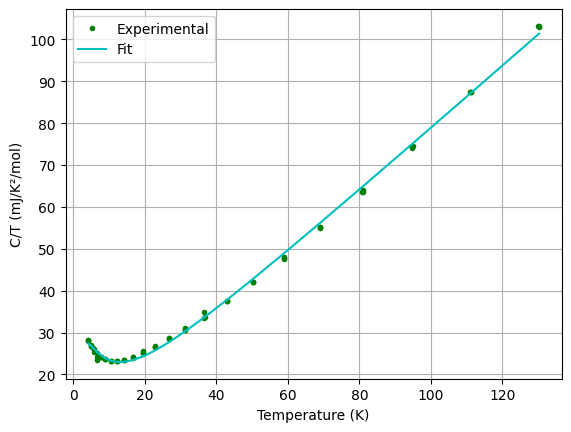

In [17]:
nonlinear_acoustic_fit.plot_fit_acoustic(0, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1, 10,5e-2, 9e-23]))

nonlinear_acoustic_fit.plot_fit_acoustic(0, 144, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, cnt.err_hc_div_temp_ISIS,
                                         bounds=([0.1, 0, 1e-3, 2e-23],[1, 10,5e-2, 9e-23]))

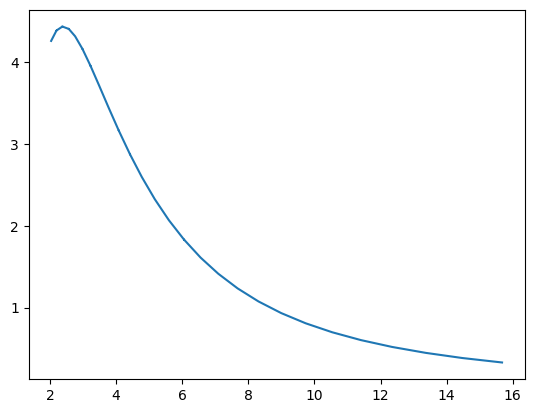

In [13]:
plt.figure()
plt.plot(cnt.temperature_ISIS[0:80], sch.schottky(cnt.temperature_ISIS, 7.931574204614548e-23, 0.0012159286233213206)[0:80])

### Linear fit, Debye model

Optimizing the experimental data from 100 $K^2$ to 400 $K^2$, where the curve seems to be linear and the schottky anomaly tend to 0, according to the Debye model : $y(x) = \beta x + \gamma $

<Figure size 640x480 with 0 Axes>

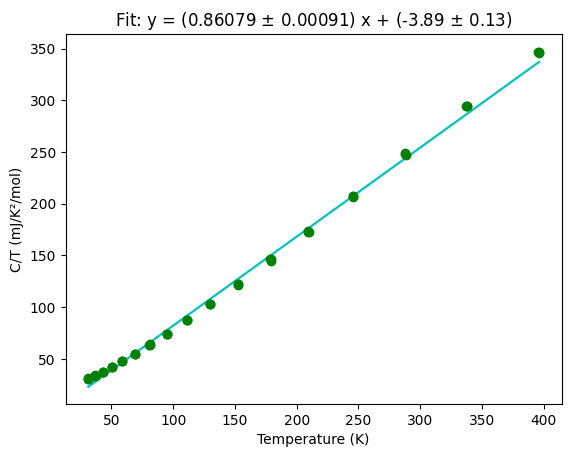

array([ 8.60789425e-01, -3.88669692e+00,  9.13811911e-04,  1.33310685e-01])

In [22]:
linear_acoustic_fit.linear_fit(30, 400, cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 
                               cnt.err_squared_temperature_ISIS,cnt.err_hc_div_temp_ISIS)

### Non linear fit, Debye + Einstein model

Fitting the experimental data to the Debye model with a quadratic contribution in temperature, simulating possible optical modes. Optimizong the paramters of the numercial model $y(x) = \beta x + \gamma + \alpha x^2 + Cs(x)$

In [28]:
x, y = tools.tab_interval(cnt.squared_temperature_ISIS, cnt.hc_div_temp_ISIS, 0, 400)

res = opt.curve_fit(nonlinear_optic_fit.model_optic, x, y)

/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/schottky_analysis.py:13: RuntimeWarning: overflow encountered in exp
  cs = (x**2)*(np.exp(x)/(1+np.exp(x))**2)
/home/garance/Documents/internship_IMPMC/HPHT_YBCO_04_06/schottky_analysis.py:13: RuntimeWarning: invalid value encountered in divide
  cs = (x**2)*(np.exp(x)/(1+np.exp(x))**2)
